## 1. Presidential inaugural addresses sentiment analysis: 
- ### Selected speeches
- Donald Trump (R -2017)
- Barack Obama (D -2013)
- George W. Bush (R -2001)
- Ronald Reagan (R -1981)
- John F. Kennedy (D -1961)
- Franklin D. Roosevelt (D-1941)

In [1]:
# read speeches

from pathlib import Path
trump = Path('trump2017.txt').read_text()
obama = Path('obama2013.txt').read_text()
bush = Path('bush2001.txt').read_text()
kennedy = Path('kennedy1961.txt').read_text()
reagan = Path('Reagan1981.txt').read_text()
roosevelt = Path('Roosevelt1941.txt').read_text()


## 2. Generate an array of word clouds, one for each speechor poem.

In [2]:
import wordcloud as wc
import matplotlib.pyplot as plt
   
# generate word cloud
trump_cloud = wc.WordCloud().generate(trump)
obama_cloud = wc.WordCloud().generate(obama)
kennedy_cloud = wc.WordCloud().generate(kennedy)
bush_cloud = wc.WordCloud().generate(bush)
roosevelt_cloud = wc.WordCloud().generate(roosevelt)
reagan_cloud = wc.WordCloud().generate(reagan)

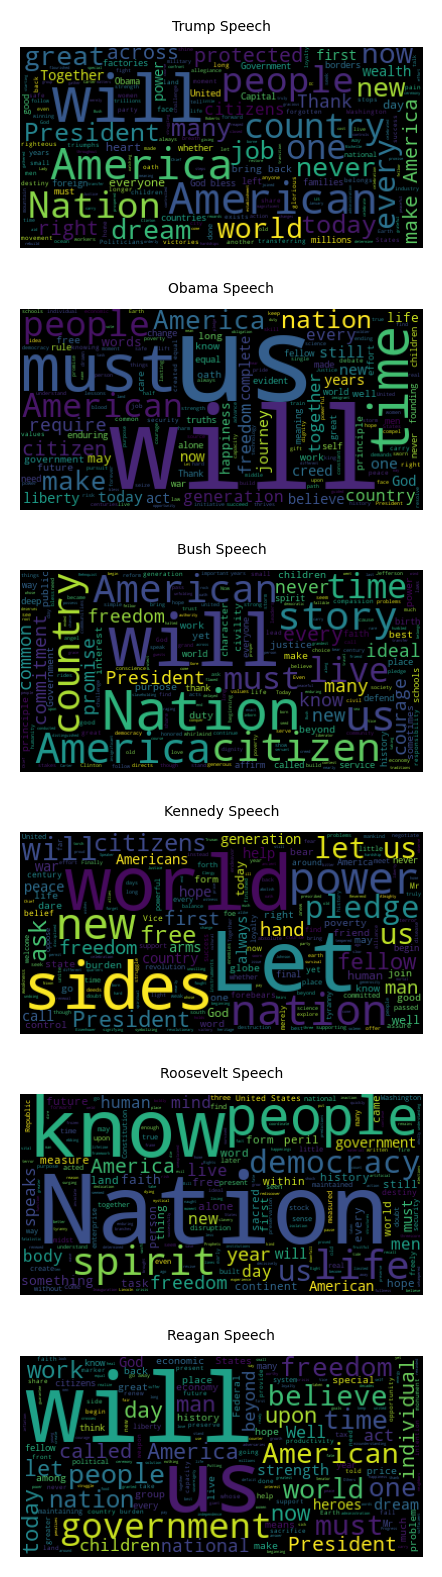

In [3]:
# display clouds in subplot
fig=plt.figure(figsize=(20,10), dpi=200)

fig.add_subplot(6,1,1)
plt.imshow(trump_cloud)
plt.title('Trump Speech', size = 5)
plt.axis('off')

fig.add_subplot(6,1,2)
plt.imshow(obama_cloud)
plt.title('Obama Speech', size = 5)
plt.axis('off')

fig.add_subplot(6,1,3)
plt.imshow(bush_cloud)
plt.title('Bush Speech', size = 5)
plt.axis('off')

fig.add_subplot(6,1,4)
plt.imshow(kennedy_cloud)
plt.title('Kennedy Speech', size = 5)
plt.axis('off')

fig.add_subplot(6,1,5)
plt.imshow(roosevelt_cloud)
plt.title('Roosevelt Speech', size = 5)
plt.axis('off')

fig.add_subplot(6,1,6)
plt.imshow(reagan_cloud)
plt.title('Reagan Speech', size = 5)
plt.axis('off')

plt.subplots_adjust(hspace=.3)

## 3. Sentiment Analysis
Conduct a sentiment analysis of the different texts and explore ways of presenting a visualcomparison.  Is sentiment correlated with political party affiliation?

In [4]:
# score sentiment sentence by sentence 
from textblob import TextBlob
import pandas as pd

def score_sentence(speech):
    '''takes a speech and score subjectivity and polarity associated with each sentence. 
    Args:
        speech(str): a speech in a string 
    
    Returns:
        sentiment_df: a dataframe with 
        columns = ['sentence number', 'sentence sentiment', 'sentence polarity']
    '''
    # split speech into sentences 
    sentence_list = speech.split('.')
    
    # initiate dict
    dic = {'sentence number': [], 
           'sentence subjectivity': [],
           'sentence polarity': []}
    
    for sentence in sentence_list:
        
        dic['sentence subjectivity'].append(TextBlob(sentence).subjectivity)
        dic['sentence polarity'].append(TextBlob(sentence).polarity)
        
    for i in range(len(sentence_list)):
        # record the sentence number
        # the smaller the sentence number, the earlier the sentence is in the speech
        dic['sentence number'].append(i)   
        
    sentiment_df = pd.DataFrame.from_dict(dic)    
    
    return sentiment_df
    


<a id='this_cell'></a>

Text(0.5, 0.98, 'Sentiment Analysis by Party')

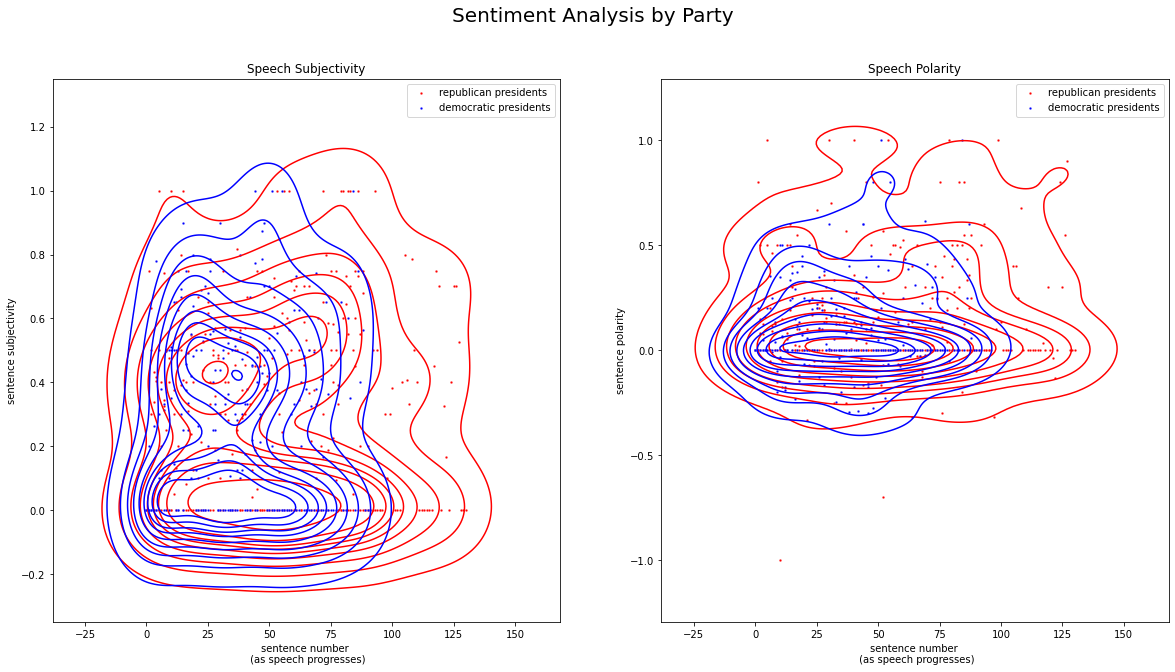

In [5]:
# visualize
import seaborn as sns

# create individual presidents df
trump_df = score_sentence(trump)
trump_df['president'] = 'trump'

obama_df = score_sentence(obama)
obama_df['president'] = 'obama'

bush_df = score_sentence(bush)
bush_df['president'] = 'bush'

kennedy_df = score_sentence(kennedy)
kennedy_df['president'] = 'kennedy'

roosevelt_df = score_sentence(roosevelt)
roosevelt_df['president'] = 'roosevelt'

reagan_df = score_sentence(reagan)
reagan_df['president'] = 'reagan'

# create political party df 
# trump, bush, reagan 
rep_df = pd.concat([trump_df, bush_df, reagan_df])
# obama, kennedy, roosevelt
dem_df = pd.concat([obama_df, kennedy_df, roosevelt_df])


# create subplot for subjectivity and polarity 
graphs = ['Speech Subjectivity', 'Speech Polarity']
for graph in range(2):
    plt.subplot(1, 2, graph+1)
    
    # plot speech subjectivity
    if graph == 0:
        sns.scatterplot(x=rep_df['sentence number'], y=rep_df['sentence subjectivity'], s =6, color = 'r', label = 'republican presidents')
        sns.scatterplot(x=dem_df['sentence number'], y=dem_df['sentence subjectivity'], s =6, color = 'b', label = 'democratic presidents')
        sns.kdeplot(x=rep_df['sentence number'], y=rep_df['sentence subjectivity'], color='r')
        sns.kdeplot(x=dem_df['sentence number'], y=dem_df['sentence subjectivity'], color='b')
        plt.title(graphs[0])
        plt.xlabel('sentence number \n (as speech progresses)')
        
    # plot speech polarity
    if graph == 1:
        sns.scatterplot(x=rep_df['sentence number'], y=rep_df['sentence polarity'], s =6, color = 'r', label = 'republican presidents')
        sns.scatterplot(x=dem_df['sentence number'], y=dem_df['sentence polarity'], s =6, color = 'b', label = 'democratic presidents')
        sns.kdeplot(x=rep_df['sentence number'], y=rep_df['sentence polarity'], color='r')
        sns.kdeplot(x=dem_df['sentence number'], y=dem_df['sentence polarity'], color='b')
        plt.title(graphs[1])
        plt.xlabel('sentence number \n (as speech progresses)')

# resize plot 
plt.gcf().set_size_inches((20, 10))
plt.suptitle('Sentiment Analysis by Party', size = 20)

## Analysis:
Republican presidents' speeches are generally longer. Democratic presidents show more subjectivity in the beginning/early middle of the speech, while republican presidents' subjectivity is more spread out throughout the speech. Republican presidents show  higher polarity that's also more spread-out throughout the speech, while democratic presidents score high on polarity in the middle of/early in the speech.

## 4. Most common non-trivial words
Identify the most common non-trivial words for each text and determine whether the most commonly used words evolved over time. For example, it would be interesting to identify, for each speech, the top 100 words of length > n (for some n) and count the number of overlapping words for each pair of presidents, plotting the results as a heat map using Seaborn.

In [6]:
import re
from collections import Counter 

# split speech into words
def speech_to_words(speech):
    '''Takes a speech and split it into a list of words
    Args:
        speech(str): a speech in a string
    
    Returns
        clean_words(list): a list of all the words in the speech
    '''
    clean_words = []
    for word in speech.split():
        word = re.sub('[^\w\s]', '', word)
        word = word.lower()
        clean_words.append(word)
        
    return clean_words

def top_100_words(clean_words, n):
    '''takes the top 100 words of length > n (for some n) from a speech
    Args:
        clean_words(list): list of cleaned words from a speech
        n(int): length of words to be selected
    
    Returns:
        top100_words(list): list of top 100 words of length > n (for some n) 
    '''
    # filter words of selected length
    top_words = [word for word in clean_words if len(word) > n]
      
    # choose top 100
    top100_words = Counter(top_words).most_common(100) # list of tuples (word, counts)
    # loop through the list to generate a list of words only
    top100_words = [i[0] for i in top100_words] 
    
    return top100_words

def words_in_common(list1, list2):
    '''find words in list 1 that are also in list 2 and 
       return a count of the words in common
    Args:
        list1(list): list of top 100 words from one president's speech
        list2(list): list of top 100 words from another president's speech
   
    Returns:
        count(int): a count of words in common
    '''
    count = 0
    for element in list1:
        if element in list2:
            count += 1
    return count
             

In [7]:
# pairs of presidents top 100 most common words
trump_common = top_100_words(speech_to_words(trump), 4)
obama_common = top_100_words(speech_to_words(obama), 4)
bush_common = top_100_words(speech_to_words(bush), 4)
kennedy_common = top_100_words(speech_to_words(kennedy), 4)
roosevelt_common = top_100_words(speech_to_words(roosevelt), 4)
reagan_common = top_100_words(speech_to_words(reagan), 4)

Text(0.5, 1.0, 'Overlapping Words between Presidents Heatmap')

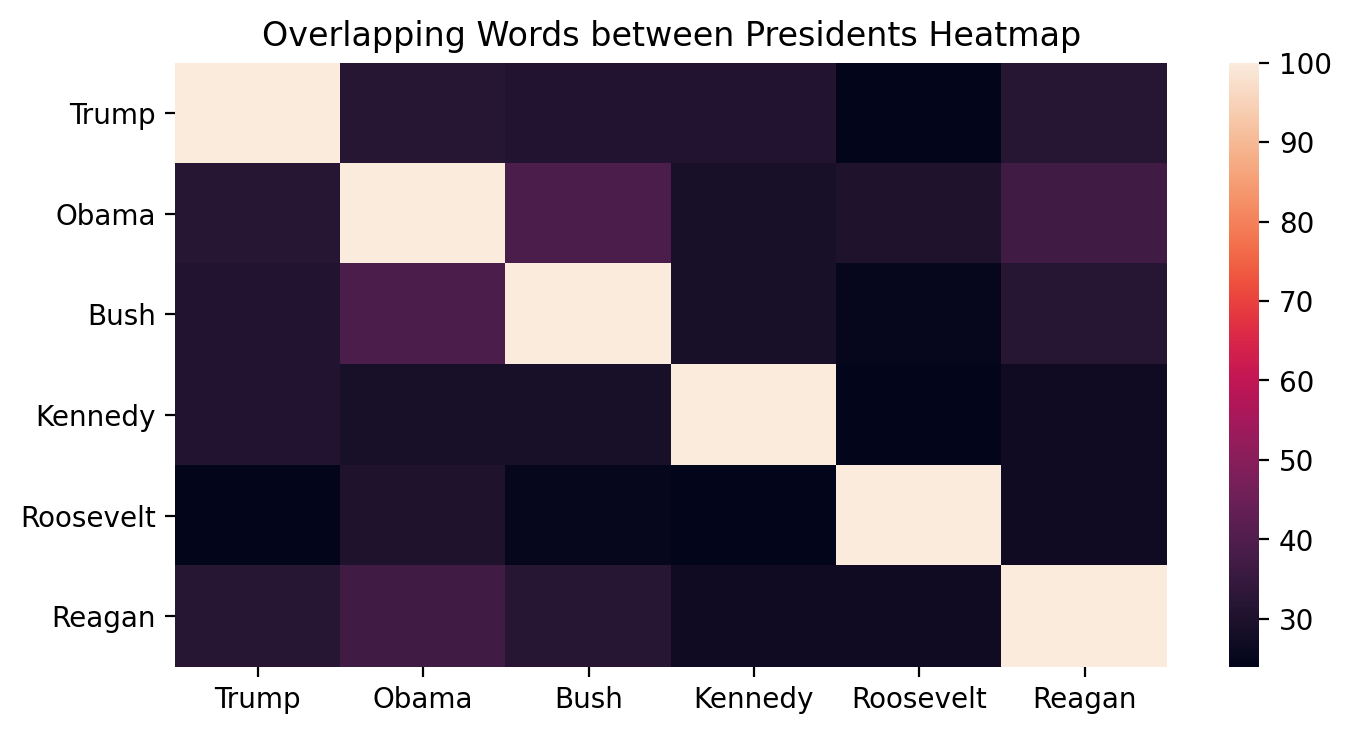

In [8]:
import numpy as np

# create matrix for heatmap
all_presidents = [trump_common, obama_common, bush_common, kennedy_common, roosevelt_common, reagan_common]
matrix = np.zeros((6,6)) 

for i in range(len(matrix)):
    for j in range(len(matrix)):
        matrix[i,j] = words_in_common(all_presidents[i],all_presidents[j])
        
# plot heatmap
plt.figure(figsize=(8,4), dpi=200)
sns.heatmap(matrix, 
            xticklabels=['Trump', 'Obama', 'Bush', 'Kennedy', 'Roosevelt', 'Reagan'],
            yticklabels=['Trump', 'Obama', 'Bush', 'Kennedy', 'Roosevelt', 'Reagan'])

plt.title('Overlapping Words between Presidents Heatmap')

## Analysis
The six presidents don't share many overlapping words with each other. However, relatively speaking, president Obama and president Bush share the most common vocabularies. The next closest vocabulary match is between president Obama and president Reagan 

## 5. Other comparative measures of speech 
Develop other comparative measures of speech analysis, such as:
- a.Average sentence length
- b.Average number of words of length > n per sentence (or per 100 words)
- c.Number of unique words per 1000 words
- d.Polarity and Subjectivity
and generate some comparative figures.

You can find the set up of the df below in [this cell](#this_cell)

In [9]:
# Polarity, subjectivity and length of speech comparison between each president 

# speech length 
def individual_speech_length(row):
    '''filter row by president. Calculate speech length for each president
    Args: 
        None
        
    Returns: 
        speech_length(int): number of words in a speech
    '''
    if row['president'] == 'trump':
        speech_length = len(speech_to_words(trump))
    if row['president'] == 'bush':
        speech_length = len(speech_to_words(bush))
    if row['president'] == 'reagan':
        speech_length = len(speech_to_words(reagan))
    if row['president'] == 'obama':
        speech_length = len(speech_to_words(obama))
    if row['president'] == 'kennedy':
        speech_length = len(speech_to_words(kennedy))
    if row['president'] == 'roosevelt':
        speech_length = len(speech_to_words(roosevelt))
        
    return speech_length




<a id='that_cell'></a>

In [10]:
# create dfs

# find mean sentence subjectivity and polarity grouped by president
all_df = pd.concat([rep_df, dem_df])
# add speech length to all_df
all_df['number of words'] = all_df.apply (lambda row: individual_speech_length(row), axis=1)
# find mean subjectivity, polarity and number of words for each president
all_df_mean = all_df.groupby('president').mean()[['sentence subjectivity','sentence polarity', 'number of words']]
all_df_mean = all_df_mean.reset_index()
# round sub
all_df_mean['sentence subjectivity'] = round(all_df_mean['sentence subjectivity'], 2)            

# plot
import plotly.express as px
fig = px.scatter(all_df_mean, x='sentence subjectivity', y='sentence polarity', 
                 size = 'number of words', color='president', title = 'Polarity, Subjectivity and Length of Speech')
fig.show()

## Analysis
Among the six preisdents, president Roosevelt scored lowest on both polarity and subjectivity. President Kennedy scored the highest in subjectivity but low in polarity. President Trump scored the highest in polarity and second highest in subjectivity. President Reagan had the longest speech. 

In [11]:
# Average sentence length
# Average number of words of length > n per 100 words
# number of unique words per 100 words

def average_sentence_length(speech):
    '''takes a speech, calculates average sentence length by dividing total number of words
        with total number of sentences
    Args:
        speech(str): a president's speech
    
    Returns:
        avg_sentence_len(int): total number of words divided by total number of sentences
    '''
    total_words = len(speech_to_words(speech))
    total_sentences = len(speech.split('.'))
    avg_sentence_len = int(total_words / total_sentences)
    
    return avg_sentence_len
    
def avg_num_long_words(speech, n):
    '''takes a speech, calcuate the average number of words of length > n per 100 words
    Args:
        speech(str): a president's speech
        n(int): selected length of word 
    
    Returns:
        avg_num_long_words(int): average number of words of length > n per 100 words
    '''
    # convert speech into a list of words
    clean_words = speech_to_words(speech)
    # select words of certain length and put them in a list
    long_words = [word for word in clean_words if len(word) > n]
    # count number of long words in total
    num_long_words = len(long_words)
    # number of long words per 100 words
    avg_num_long_words = int(num_long_words / 100)
    
    return avg_num_long_words

def num_unique_words(speech):
    '''takes a speech, calculate the number of unique words per 100words
    Args:
        speech(str): a president's speech
    
    Returns:
        num_unique_words(int): number of unique words per 100 words
    '''
    clean_words = speech_to_words(speech)
    # convert to a set of unique words
    unique = set(clean_words)
    num_unique_words = int(round(len(unique) / 100, 0))
    
    return num_unique_words



In [12]:
# initiate dictionary to later convert to dataframe
structure_speech = {'avg sentence length': [], 'avg num long words' : [], 'num unique words': [] }

for speech in (trump, obama, bush, kennedy, reagan, roosevelt):
    # apply functions defined above and append values in the dictionary value lists
    structure_speech['avg sentence length'].append(average_sentence_length(speech))
    structure_speech['avg num long words'].append(avg_num_long_words(speech, 4))
    structure_speech['num unique words'].append(num_unique_words(speech))
# add the name of the president in order
structure_speech['president'] = ['trump', 'obama', 'bush', 'kennedy', 'reagan', 'roosevelt']

# convert dict to df
structure_speech = pd.DataFrame.from_dict(structure_speech)
structure_speech

avg sentence length  avg num long words  num unique words  president
0                   15                   6                 5      trump
1                   22                   8                 8      obama
2                   16                   6                 6       bush
3                   23                   5                 5    kennedy
4                   18                   9                 8     reagan
5                   17                   5                 5  roosevelt

In [13]:
# plot subplots 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, start_cell="bottom-left")

fig.add_trace(go.Bar(x=structure_speech['president'], y=structure_speech['avg sentence length'], name = 'average sentence length'  ),
              row=1, col=1)

fig.add_trace(go.Bar(x=structure_speech['president'], y=structure_speech['avg num long words'], name = 'average number of words > length of 4 per 100 words'),
              row=1, col=2)

fig.add_trace(go.Bar(x=structure_speech['president'], y=structure_speech['num unique words'], name = 'number of unique words per 100 words'),
              row=1, col=3)



## Analysis
President Trump used shortest sentences among the six presidents' inaugural speeches. President Reagan used fancier and longer words on average. President Obama and president Roosevelt used the most unique words per 100 words. The graph illustrates that the sentence length and number of long words and unique words do not show negative or positive correlate with progression of time/year they were written in. 

You can find the set up of all_df_mean in [this cell](#that_cell)

In [14]:
# correlation graph
# add the year of speech in order to the average sentiment df created previously 
all_df_mean['year'] = [2001, 1961, 2013, 1981, 1941, 2017]
all_df_mean

president  sentence subjectivity  sentence polarity  number of words  year
0       bush                   0.30           0.127623           1591.0  2001
1    kennedy                   0.35           0.096117           1341.0  1961
2      obama                   0.29           0.092540           2090.0  2013
3     reagan                   0.28           0.113674           2423.0  1981
4  roosevelt                   0.26           0.076555           1336.0  1941
5      trump                   0.31           0.137915           1455.0  2017

In [15]:
# read csv containing indices information for the above years
indices_df = pd.read_csv('indices.csv')
indices_df

GDP in trillions  GDP growth rate%      CPI  Inflation Rate %  \
0            19.520              2.37  242.839              2.14   
1            16.780              2.70  230.280              1.46   
2            10.580              1.00  175.100              2.85   
3             3.207              2.50   90.900             10.32   
4             0.563              2.30   29.800              1.01   
5             0.129             17.70   14.100              5.00   

   Unemployment Rate %  year  
0                  4.1  2017  
1                  7.9  2013  
2                  5.6  2001  
3                  8.5  1981  
4                  6.0  1961  
5                  9.9  1941

In [16]:
# merge all_df_mean and indices_df by year
corr_df = all_df_mean.merge(indices_df, how='inner', on='year')
corr_df.sort_values(by=['year'], ascending = False)

president  sentence subjectivity  sentence polarity  number of words  year  \
5      trump                   0.31           0.137915           1455.0  2017   
2      obama                   0.29           0.092540           2090.0  2013   
0       bush                   0.30           0.127623           1591.0  2001   
3     reagan                   0.28           0.113674           2423.0  1981   
1    kennedy                   0.35           0.096117           1341.0  1961   
4  roosevelt                   0.26           0.076555           1336.0  1941   

   GDP in trillions  GDP growth rate%      CPI  Inflation Rate %  \
5            19.520              2.37  242.839              2.14   
2            16.780              2.70  230.280              1.46   
0            10.580              1.00  175.100              2.85   
3             3.207              2.50   90.900             10.32   
1             0.563              2.30   29.800              1.01   
4             0.129             17.70   14.100              5.00   

   Unemployment Rate %  
5                  4.1  
2                  7.9  
0                  5.6  
3                  8.5  
1                  6.0  
4                  9.9

In [17]:
# correlation matroc
corr_matrix= corr_df.corr()
corr_matrix

sentence subjectivity  sentence polarity  \
sentence subjectivity               1.000000           0.281739   
sentence polarity                   0.281739           1.000000   
number of words                    -0.351360           0.083485   
year                                0.148113           0.709215   
GDP in trillions                    0.054941           0.583988   
GDP growth rate%                   -0.614465          -0.683823   
CPI                                 0.035261           0.634044   
Inflation Rate %                   -0.582739           0.000693   
Unemployment Rate %                -0.715468          -0.804222   

                       number of words      year  GDP in trillions  \
sentence subjectivity        -0.351360  0.148113          0.054941   
sentence polarity             0.083485  0.709215          0.583988   
number of words               1.000000  0.338942          0.125406   
year                          0.338942  1.000000          0.937956   
GDP in trillions              0.125406  0.937956          1.000000   
GDP growth rate%             -0.368641 -0.721217         -0.477081   
CPI                           0.251773  0.978691          0.983882   
Inflation Rate %              0.622600 -0.275758         -0.421922   
Unemployment Rate %           0.333892 -0.616507         -0.573789   

                       GDP growth rate%       CPI  Inflation Rate %  \
sentence subjectivity         -0.614465  0.035261         -0.582739   
sentence polarity             -0.683823  0.634044          0.000693   
number of words               -0.368641  0.251773          0.622600   
year                          -0.721217  0.978691         -0.275758   
GDP in trillions              -0.477081  0.983882         -0.421922   
GDP growth rate%               1.000000 -0.569793          0.180202   
CPI                           -0.569793  1.000000         -0.332630   
Inflation Rate %               0.180202 -0.332630          1.000000   
Unemployment Rate %            0.689834 -0.557470          0.538758   

                       Unemployment Rate %  
sentence subjectivity            -0.715468  
sentence polarity                -0.804222  
number of words                   0.333892  
year                             -0.616507  
GDP in trillions                 -0.573789  
GDP growth rate%                  0.689834  
CPI                              -0.557470  
Inflation Rate %                  0.538758  
Unemployment Rate %               1.000000

Text(0.5, 1.0, 'Correlation Heatmap')

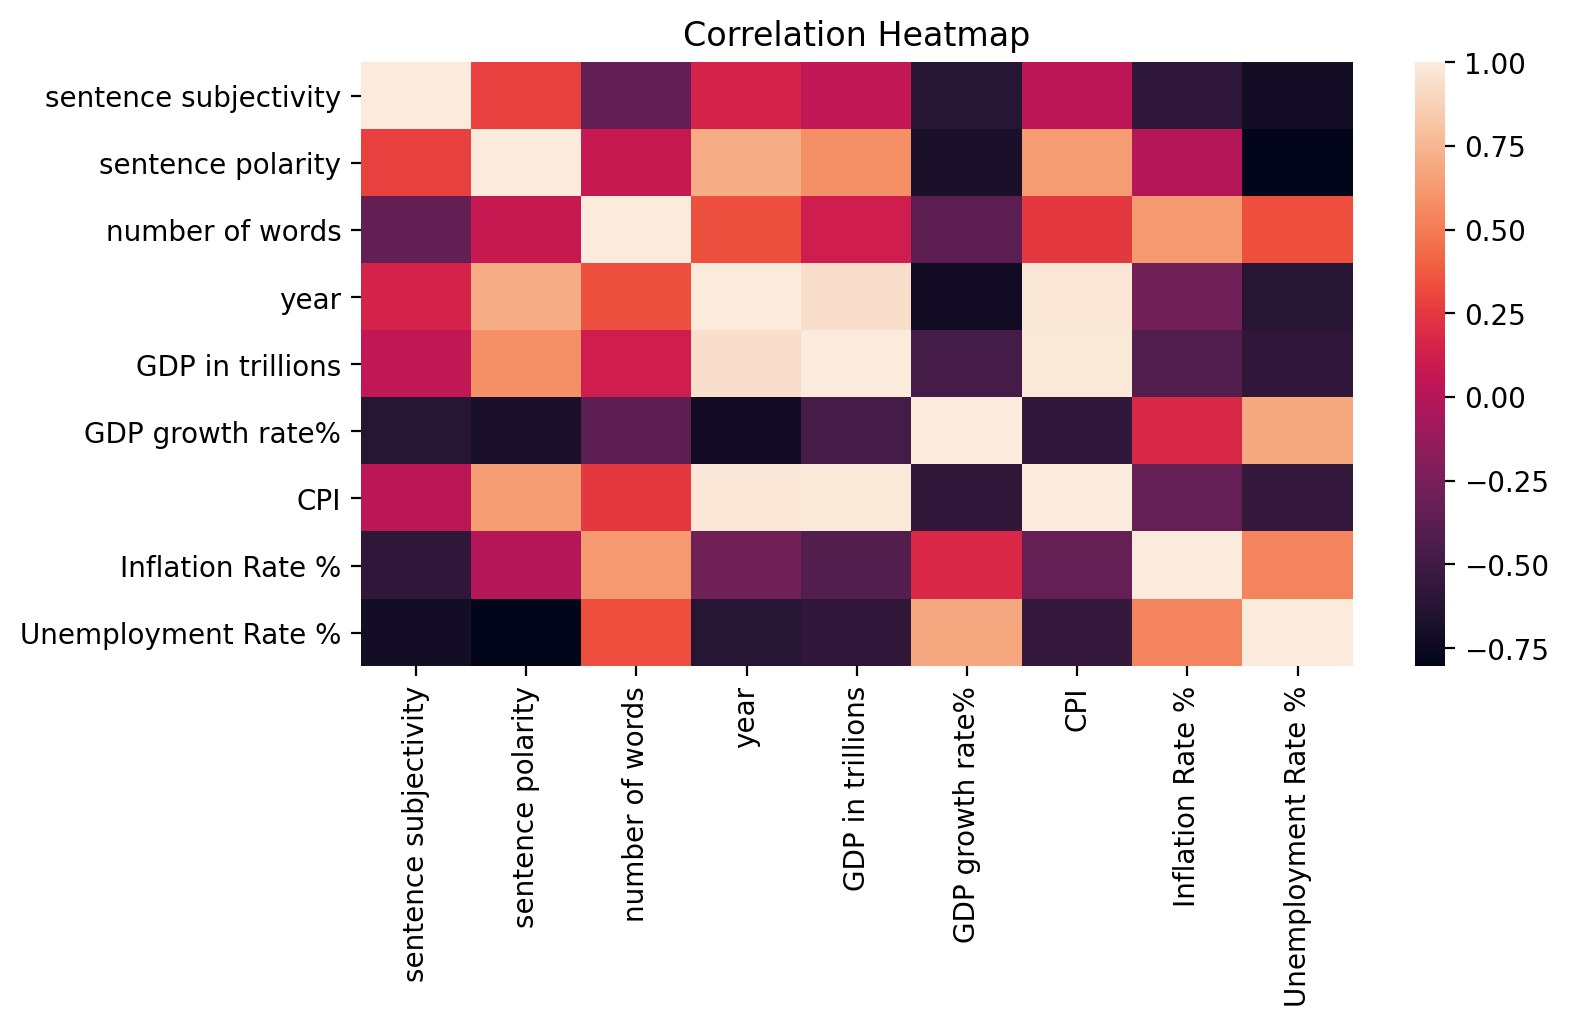

In [18]:
# plot heatmap
plt.figure(figsize=(8,4), dpi=200)
sns.heatmap(corr_matrix)
plt.title('Correlation Heatmap')


## Analysis
Belowe are pairs that show strong correlation (in relation to inagural speech) in descending order
- year of speech and GDP
- year of speech and CPI
- sentence polarity and year of the speech
- sentence polarity and CPI
- number of words and inflation rate
- sentence polarity and GDP
- sentence subjectivity and sentencepolarity